In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import string 
from keras.datasets import imdb
from keras.models import Sequential
from keras.layers import Dense
from keras.layers.embeddings import Embedding
from keras.layers import Flatten
import seaborn as sns
%matplotlib inline
sns.set()

In [35]:
np_load_old = np.load

# modify the default parameters of np.load
np.load = lambda *a,**k: np_load_old(*a, allow_pickle=True, **k)

# call load_data with allow_pickle implicitly set to true
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

# restore np.load for future normal usage
np.load = np_load_old

In [36]:
train_data.shape

(25000,)

In [37]:
train_labels.shape

(25000,)

In [38]:
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [39]:
imdb.get_word_index()

{"sixties'": 55117,
 'draper': 21034,
 'waterworks': 42491,
 'squadrons': 85513,
 'shortly': 3630,
 'rawlings': 41243,
 'corresponding': 23077,
 'integrates': 29804,
 'kuenster': 80922,
 'constained': 63026,
 "'artistic": 59659,
 "mani's": 41108,
 "losey's": 40085,
 'tobikage': 66531,
 'handouts': 84274,
 'rammed': 15168,
 '607': 34993,
 "'mouth'": 68352,
 'garnering': 27990,
 "participant's": 65754,
 'disintegration': 24670,
 'morocco': 20480,
 'ands': 24603,
 'unequally': 83485,
 "'sympathy": 71600,
 "dalia's": 67840,
 'desenex': 59002,
 'reconstituirea': 43731,
 'apocalyptic': 7353,
 "gibb's": 47456,
 'frat': 8248,
 'grease': 8078,
 'overhauled': 56301,
 'firode': 17350,
 'sneaky': 15747,
 'bakshki': 80352,
 'similarly': 4376,
 'octopuses': 45996,
 'straining': 20792,
 'panamericano': 59768,
 'coordinators': 49122,
 'colony': 8181,
 "timon's": 16472,
 'muggers': 31921,
 'undermines': 13395,
 'rainbeaux': 27709,
 'lucianna': 40669,
 'rocket': 4347,
 'babyface': 40680,
 'bluntschi': 5

In [40]:
word_dict=imdb.get_word_index()
word_dict={key:(value+3) for key,value in word_dict.items()}
word_dict['']=0
word_dict['>']=1
word_dict['']=2
reverse_word_dict ={v:k for k,v in word_dict.items()}
print(' '.join(reverse_word_dict[id] for id in train_data[0]))

> this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert  is an amazing actor and now the same being director  father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for  and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also  to the two little boy's that played the  of norman and paul they were just brilliant children are often left out of the  list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you think the

In [41]:
from keras.preprocessing import sequence 
max_review_length = 500 
train_data = sequence.pad_sequences(train_data, maxlen=max_review_length) 
test_data = sequence.pad_sequences(test_data, maxlen=max_review_length)

In [42]:
test_data.shape==train_data.shape

True

In [43]:
embedding_vector_length = 32 
model = Sequential() 
model.add(Embedding(top_words, embedding_vector_length, input_length=max_review_length)) 
model.add(Flatten())
model.add(Dense(16, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid')) 
model.compile(loss='binary_crossentropy',optimizer='adam', metrics=['accuracy']) 
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 500, 32)           320000    
_________________________________________________________________
flatten_2 (Flatten)          (None, 16000)             0         
_________________________________________________________________
dense_4 (Dense)              (None, 16)                256016    
_________________________________________________________________
dense_5 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 17        
Total params: 576,305
Trainable params: 576,305
Non-trainable params: 0
_________________________________________________________________
None


In [44]:
hist = model.fit(train_data, train_labels, validation_data=(test_data, test_labels), epochs=5, batch_size=128)

Train on 25000 samples, validate on 25000 samples
Epoch 1/5
25000/25000 [==============================] - 15s - loss: 0.5404 - acc: 0.6754 - val_loss: 0.2983 - val_acc: 0.8741
Epoch 2/5
25000/25000 [==============================] - 14s - loss: 0.1912 - acc: 0.9282 - val_loss: 0.2969 - val_acc: 0.8774
Epoch 3/5
25000/25000 [==============================] - 13s - loss: 0.0547 - acc: 0.9862 - val_loss: 0.3628 - val_acc: 0.8714
Epoch 4/5
25000/25000 [==============================] - 11s - loss: 0.0110 - acc: 0.9984 - val_loss: 0.4303 - val_acc: 0.8705
Epoch 5/5
25000/25000 [==============================] - 8s - loss: 0.0024 - acc: 0.9998 - val_loss: 0.4863 - val_acc: 0.8716


[]

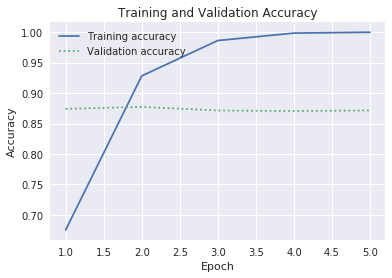

In [45]:
acc = hist.history['acc']
val = hist.history['val_acc']
epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, '-', label='Training accuracy')
plt.plot(epochs, val, ':', label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='upper left')
plt.plot()

[]

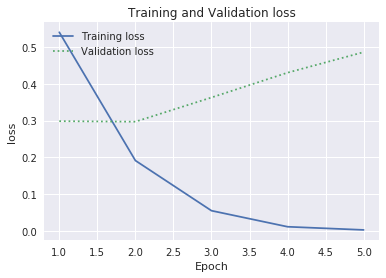

In [46]:
acc = hist.history['loss']
val = hist.history['val_loss']
epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, '-', label='Training loss')
plt.plot(epochs, val, ':', label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epoch')
plt.ylabel('loss')
plt.legend(loc='upper left')
plt.plot()


In [47]:
scores = model.evaluate(test_data, test_labels, verbose=0) 
print("Accuracy: %.2f%%" % (scores[1] * 100))

Accuracy: 87.16%


In [48]:
def analyze(text):
    # Prepare the input by removing punctuation characters, converting
    # characters to lower case, and removing words containing numbers
    translator = str.maketrans('', '', string.punctuation)
    text = text.translate(translator)
    text = text.lower().split(' ')
    text = [word for word in text if word.isalpha()]

    # Generate an input tensor
    input = [1]
    for word in text:
        if word in word_dict and word_dict[word] < top_words:
            input.append(word_dict[word])
        else:
            input.append(2)
    padded_input = sequence.pad_sequences([input], maxlen=max_review_length)

    # Invoke the model and return the result
    result = model.predict(np.array([padded_input][0]))[0][0]
    return result

In [49]:
analyze('Easily the most stellar experience I have ever had.')

0.9444241

In [50]:
analyze('The long lines and poor customer service really turned me off.')

0.024026781